In [1]:
!pip install -q "flwr-datasets[vision]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.3.1 which is incompatible.


In [2]:
!pip install -U "flwr[simulation]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.1/465.1 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.1
    Uninstalling cryptography-43.0.1:
      Successfully uninstalled cryptography-43.0.1
ERROR: pip's dependency resolver do

In [3]:
!pip install ray

## Importing Modules

In [4]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions, plot_comparison_label_distribution

## IID Partitioning

In [5]:
fds_iid = FederatedDataset(
    dataset="cifar10",
    partitioners={"train": IidPartitioner(num_partitions=20)}
)

partitioner = fds_iid.partitioners["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

## Ploting

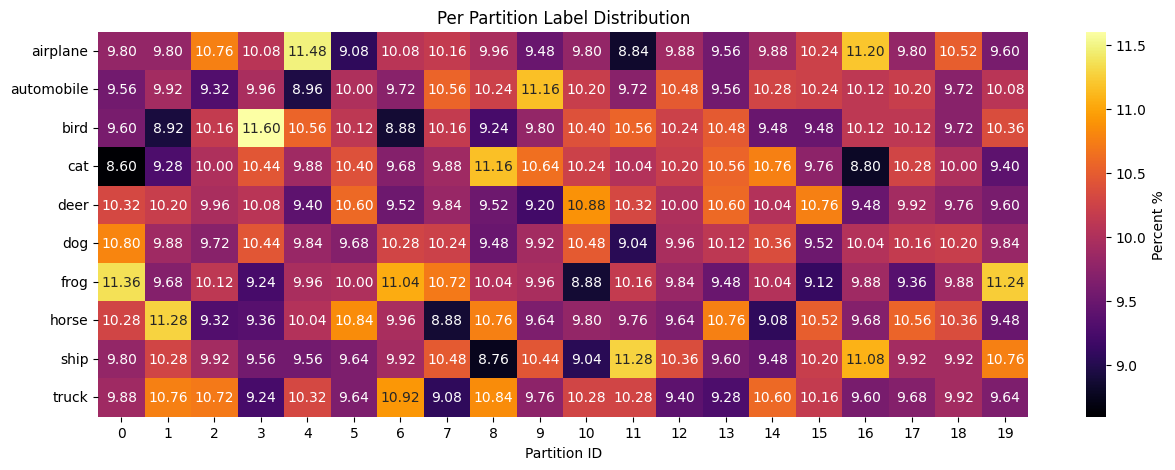

In [6]:
figure, axis, dataframe = plot_label_distributions(
    partitioner=partitioner,
    label_name="label",
    size_unit="percent",
    plot_type="heatmap",
    legend=True,
    cmap="inferno",
    figsize=(15,5),
    plot_kwargs={"annot": True}
)

## Non-IID Partitining

In [7]:
fds_niid = FederatedDataset(
    dataset="cifar10",
    partitioners={
        "train": DirichletPartitioner(
            num_partitions=20,
            partition_by="label",
            alpha=0.1,
            min_partition_size=0
        )
    }
)

partitioner = fds_niid.partitioners["train"]

## Ploting

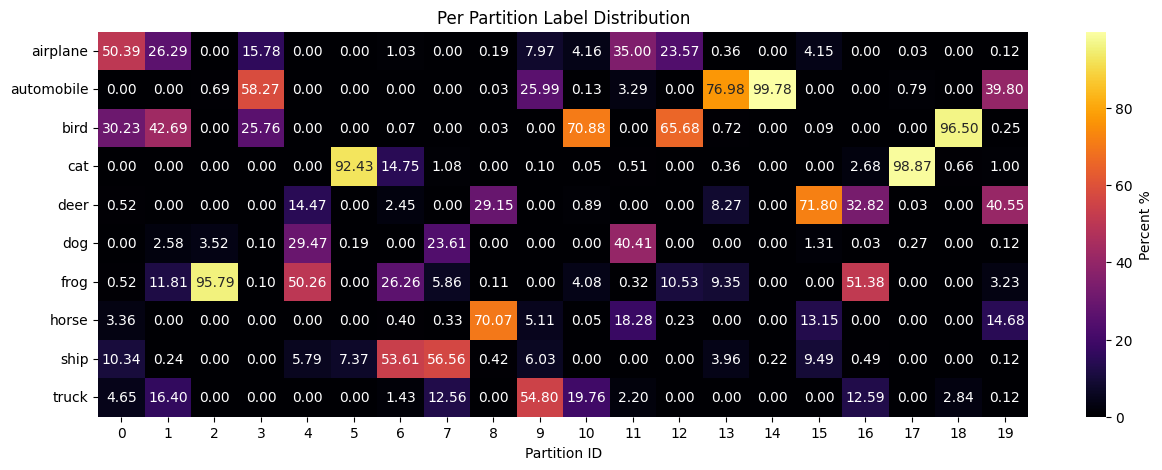

In [8]:
figure, axis, dataframe = plot_label_distributions(
    partitioner=partitioner,
    label_name="label",
    size_unit="percent",
    plot_type="heatmap",
    legend=True,
    cmap="inferno",
    figsize=(15,5),
    plot_kwargs={"annot": True}
)

## Exploring Alpha

In [9]:
partitioner_list = []
alpha_list = [10_000.0, 100.0, 1.0, 0.1, 0.01, 0.00001]

for alpha in alpha_list:
    fds = FederatedDataset(
        dataset="cifar10",
        partitioners={
            "train": DirichletPartitioner(
                num_partitions=20,
                partition_by="label",
                alpha=alpha,
                min_partition_size=0
            )
        }
    )

    partitioner_list.append(fds.partitioners["train"])

## Ploting

/usr/local/lib/python3.10/dist-packages/flwr_datasets/visualization/comparison_label_distribution.py:213: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


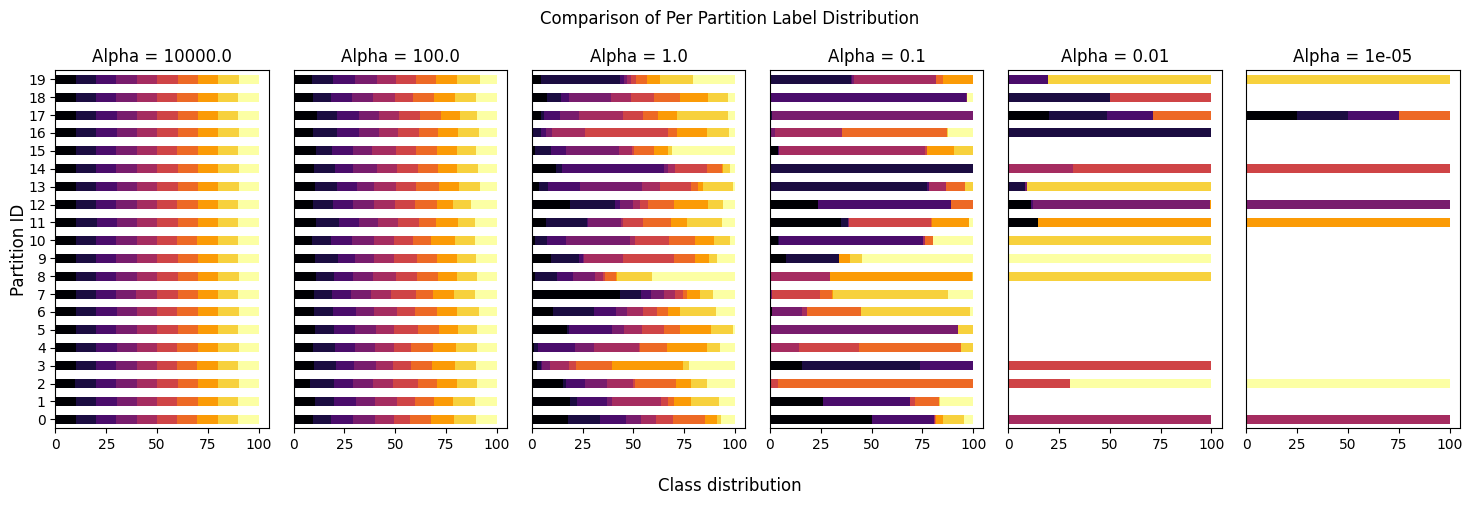

In [10]:
fig, axes, dataframe_list = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="label",
    cmap="inferno",
    figsize=(15, 5),
    titles=[f"Alpha = {alpha}" for alpha in alpha_list],
)

## Installing and Importing Flower

In [11]:
!pip install flwr tensorflow

In [12]:
import flwr as fl
import tensorflow as tf
import numpy as np

from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions, plot_comparison_label_distribution

## Client Implementation

In [13]:
class Cliente(fl.client.NumPyClient):
    def __init__(self, cid, niid, num_clients, dirichlet_alpha):
         self.cid             = int(cid)
         self.niid            = niid
         self.num_clients     = num_clients
         self.dirichlet_alpha = dirichlet_alpha

         self.x_train, self.y_train, self.x_test, self.y_test = self.load_data()
         self.model                                           = self.create_model(self.x_train.shape)

    def get_parameters(self, config):
        return self.model.get_weights()

    def load_data(self):
        if self.niid:
            partitioner_train = DirichletPartitioner(num_partitions=self.num_clients, partition_by="label",
                                    alpha=self.dirichlet_alpha, min_partition_size=0,
                                    self_balancing=False)
            partitioner_test = DirichletPartitioner(num_partitions=self.num_clients, partition_by="label",
                                    alpha=self.dirichlet_alpha, min_partition_size=0,
                                    self_balancing=False)
        else:
            partitioner_train =  IidPartitioner(num_partitions=self.num_clients)
            partitioner_test  = IidPartitioner(num_partitions=self.num_clients)

        fds               = FederatedDataset(dataset='mnist', partitioners={"train": partitioner_train})
        train             = fds.load_partition(self.cid).with_format("numpy")

        fds_eval          = FederatedDataset(dataset='mnist', partitioners={"test": partitioner_test})
        test              = fds_eval.load_partition(self.cid).with_format("numpy")

        return train['image']/255.0, train['label'], test['image']/255.0, test['label']

    def create_model(self, input_shape):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16,  activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax'),

        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return model

    def fit(self, parameters, config):
          self.model.set_weights(parameters)

          history = self.model.fit(self.x_train, self.y_train, epochs=1)
          acc     = np.mean(history.history['accuracy'])
          loss    = np.mean(history.history['loss'])

          trained_parameters = self.model.get_weights()

          fit_msg = {
              'cid'     : self.cid,
              'accuracy': acc,
              'loss'    : loss,
          }

          self.log_client('train.csv', config['server_round'], acc, loss)
          return trained_parameters, len(self.x_train), fit_msg

    def evaluate(self, parameters, config):
          self.model.set_weights(parameters)
          loss, acc = self.model.evaluate(self.x_test, self.y_test)
          eval_msg = {
              'cid'     : self.cid,
              'accuracy': acc,
              'loss'    : loss
          }
          self.log_client('evaluate.csv', config['server_round'], acc, loss)
          return loss, len(self.x_test), eval_msg

    def log_client(self, file_name, server_round, acc, loss):
        with open(file_name, 'a') as file:
            file.write(f'{server_round}, {self.cid}, {acc}, {loss}\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Server Implementation

In [51]:
from flwr.common import FitIns
from flwr.common import parameters_to_ndarrays
from flwr.common import ndarrays_to_parameters
from flwr.common import EvaluateIns

from flwr.server.strategy import aggregate
import random

class Servidor(fl.server.strategy.FedAvg):
    def __init__(self, num_clients, dirichlet_alpha, fraction_fit=0.2):
        self.num_clients     = num_clients
        self.dirichlet_alpha = dirichlet_alpha

        self.clients_data = {
            "training_clients": [],
            "validation_clients": []
        }

        super().__init__(fraction_fit=fraction_fit, min_available_clients=num_clients)


    def configure_fit(self, server_round, parameters, client_manager):
        """Configure the next round of training."""

        config = {
            'server_round': server_round,
        }
        fit_ins = FitIns(parameters, config)

        if len(self.clients_data["training_clients"]) < 1:
          sample_size, min_num_clients = self.num_fit_clients(
              client_manager.num_available()
          )
          clients = client_manager.sample(
              num_clients=sample_size, min_num_clients=min_num_clients
          )

          training_percentage = int(len(clients) * 0.7)

          self.clients_data["training_clients"] = random.sample(clients, training_percentage)
          self.clients_data["validation_clients"] = list(set(clients) - set(self.clients_data["training_clients"]))

        return [(client, fit_ins) for client in self.clients_data["training_clients"]]

    def aggregate_fit(self, server_round, results, failures):
        parameters_list = []
        for _, fit_res in results:
            parameters = parameters_to_ndarrays(fit_res.parameters)
            exemplos   = int(fit_res.num_examples)

            parameters_list.append([parameters, exemplos])

        agg_parameters = aggregate.aggregate(parameters_list)
        agg_parameters = ndarrays_to_parameters(agg_parameters)

        return agg_parameters, {}

    def configure_evaluate(self, server_round, parameters, client_manager):
        config = {
            'server_round': server_round,
        }

        evaluate_ins = EvaluateIns(parameters, config)
        return [(client, evaluate_ins) for client in self.clients_data["validation_clients"]]

    def aggregate_evaluate(self, server_round, results, failures):
        accuracies = []

        for _, response in results:
            acc = response.metrics['accuracy']
            accuracies.append(acc)

        avg_acc = sum(accuracies)/len(accuracies)
        print(f"Rodada {server_round} acurácia agregada: {avg_acc}")

        return avg_acc, {}


# Flower Simulation NIID

In [15]:
NCLIENTS        = 20
NROUNDS         = 20
NIID            = True
DIRICHLET_ALPHA = 0.1
FRACTION_FIT    = 0.2

In [36]:
def create_client(cid):
    client = Cliente(cid, NIID, NCLIENTS, DIRICHLET_ALPHA)
    return client.to_client()

In [52]:
class Simulation():
    def __init__(self):
        self.server  = Servidor(num_clients=NCLIENTS, dirichlet_alpha=DIRICHLET_ALPHA, fraction_fit=FRACTION_FIT)

    def run_simulation(self):
        fl.simulation.start_simulation(
            client_fn     = create_client,
            num_clients   = NCLIENTS,
            config        = fl.server.ServerConfig(num_rounds=NROUNDS),
            strategy      = self.server)

Simulation().run_simulation()

INFO :      Starting Flower simulation, config: num_rounds=20, no round_timeout
2024-10-13 00:31:36,561	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'CPU': 2.0, 'object_store_memory': 3993952665.0, 'memory': 7987905332.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=19171) 2024-10-13 00:31:41.932138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already be

 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:54 1s/step - accuracy: 0.0000e+00 - loss: 2.2935
54/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 1.2608
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8103 - loss: 0.9825
 16/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1463 - loss: 2.1226 
 50/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3242 - loss: 1.8635
 83/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 1.6495
119/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 1.4649
154/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5548 - loss: 1.3286
196/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 1.2041
239/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6382 - loss: 1.1045
276/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 1.0350


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


313/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.9766
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6967 - loss: 0.9394


(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171) 
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19171)         
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173) 
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.
(ClientAppActor pid=19173)        

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4267 - loss: 4.0600  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/26 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9062 - loss: 0.6060
Rodada 1 acurácia agregada: 0.6019924134016037
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.9019  


(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)          [repeated 2x across cluster]
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 4:05 3s/step - accuracy: 0.9688 - loss: 0.2462
14/85 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9916 - loss: 0.1257
38/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9945 - loss: 0.0869
65/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.0672
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9962 - loss: 0.0600
 30/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.2703    
 90/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.2275
150/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9380 - loss: 0.2157
208/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9395 - loss: 0.2090


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


269/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9412 - loss: 0.2030
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9428 - loss: 0.1973


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/26 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.9062 - loss: 0.4850
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.9482


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated 

Rodada 2 acurácia agregada: 0.6376994848251343
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4377 - loss: 6.3736  
20/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0768 
55/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0652
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0559
  1/339 ━━━━━━━━━━━━━━━━━━━━ 5:47 1s/step - accuracy: 0.9375 - loss: 0.1871
 51/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1359
109/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1315
160/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1331
218/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.1326
266/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1317


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9630 - loss: 0.1308


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/22 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.5000 - loss: 7.2006
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 8.2661  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated 

Rodada 3 acurácia agregada: 0.6273127198219299
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 1.2317  
16/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.1764 
43/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0995
64/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0788
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9896 - loss: 0.0692
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9901 - loss: 0.0666
  1/339 ━━━━━━━━━━━━━━━━━━━━ 8:37 2s/step - accuracy: 0.9688 - loss: 0.1074
 36/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1277
 72/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.1158
105/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1110
136/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.1102
166/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.1090
199/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9687 -

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9693 - loss: 0.1050


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/26 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.9062 - loss: 0.6763
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 1.4073


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.
(ClientAppActor pid=19173)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated 

Rodada 4 acurácia agregada: 0.6378080248832703
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 10.0524 
17/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.0630 
50/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0369
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9912 - loss: 0.0382
  1/339 ━━━━━━━━━━━━━━━━━━━━ 7:30 1s/step - accuracy: 1.0000 - loss: 0.0334
 54/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0841
112/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.0824
138/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0830
192/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0829


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


249/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0826
302/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0828


(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9761 - loss: 0.0832
 1/26 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.9062 - loss: 0.7925
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 1.6102


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/22 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.5000 - loss: 10.2598
Rodada 5 acurácia agregada: 0.6314655393362045
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 11.6831  


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:14 2s/step - accuracy: 0.9688 - loss: 0.0553
38/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9933 - loss: 0.0386
72/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0415
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9954 - loss: 0.0414
 30/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.0935 
 89/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0731
147/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0706
204/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0695


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


264/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0697
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9786 - loss: 0.0698


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4520 - loss: 13.0882   
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4461 - loss: 13.3521


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated 

Rodada 6 acurácia agregada: 0.6513117402791977
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8914 - loss: 1.7013  
 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:17 2s/step - accuracy: 0.9062 - loss: 0.2184
28/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.1076
41/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0916
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0644
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0636
 54/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0528
 96/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0548
129/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0560
159/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0567
193/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0572
226/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9825 - loss: 0.0577
254/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - 

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


327/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0589
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0590


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

 1/26 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.9062 - loss: 0.9335 [repeated 2x across cluster]
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4384 - loss: 13.8166  
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 1.8145  
Rodada 7 acurácia agregada: 0.6327774673700333
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 1.8638


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


14/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.1385 
41/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0858
61/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0736
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9940 - loss: 0.0658
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9941 - loss: 0.0649
 19/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0693 
 51/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0548
 82/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0511
118/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0496
154/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0493
181/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0493
215/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0496
248/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0499
275/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


329/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0506
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0508


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 1.8755  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/22 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.5000 - loss: 12.6590
Rodada 8 acurácia agregada: 0.6474255621433258
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4536 - loss: 14.5574  


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


19/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.1000 
51/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0753
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0630
  1/339 ━━━━━━━━━━━━━━━━━━━━ 6:49 1s/step - accuracy: 1.0000 - loss: 0.0357
 58/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0378
 86/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0412
141/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9886 - loss: 0.0432
195/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0441


INFO :      aggregate_fit: received 2 results and 0 failures


255/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0447
300/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0450


INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions o

339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9871 - loss: 0.0452
 1/22 ━━━━━━━━━━━━━━━━━━━━ 13s 649ms/step - accuracy: 0.5000 - loss: 13.3359
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4468 - loss: 15.2505
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4452 - loss: 15.3444


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated

Rodada 9 acurácia agregada: 0.6506015062332153
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8823 - loss: 1.9451  
 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 0.9062 - loss: 0.3562
34/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0936
68/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0671
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0628
 56/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0644
110/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0538
158/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.0501
191/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0485
223/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0476
258/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0470


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


294/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0464
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9861 - loss: 0.0457


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 2.0513
  1/339 ━━━━━━━━━━━━━━━━━━━━ 5:37 999ms/step - accuracy: 0.9375 - loss: 0.3388


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated

Rodada 10 acurácia agregada: 0.6457880437374115
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4490 - loss: 16.0964  
 1/85 ━━━━━━━━━━━━━━━━━━━━ 4:37 3s/step - accuracy: 0.9688 - loss: 0.0750
20/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0575
38/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9903 - loss: 0.0500
55/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9922 - loss: 0.0460
72/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9931 - loss: 0.0447
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9937 - loss: 0.0431
 27/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0387  
 56/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0364
110/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0343
137/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0337
216/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0334


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


273/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0334
325/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0336


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0337
 1/22 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.5000 - loss: 13.3826
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4460 - loss: 15.2637


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated

Rodada 11 acurácia agregada: 0.6458965688943863
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 1.9830  
17/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.1901 
50/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.1179
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0959
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0885
  1/339 ━━━━━━━━━━━━━━━━━━━━ 8:57 2s/step - accuracy: 1.0000 - loss: 0.0025
 26/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0158 
 81/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0179
134/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0214
187/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0243


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


245/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9929 - loss: 0.0263
297/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0274


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0281
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4680 - loss: 16.2847   
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4550 - loss: 16.8539


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/26 ━━━━━━━━━━━━━━━━━━━━ 10s 439ms/step - accuracy: 0.9375 - loss: 1.1054
Rodada 12 acurácia agregada: 0.6505425423383713
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 2.1405


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


18/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0623 
51/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0482
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9959 - loss: 0.0419
  1/339 ━━━━━━━━━━━━━━━━━━━━ 5:49 1s/step - accuracy: 1.0000 - loss: 0.0289
 58/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0313
115/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.0291
159/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0284
217/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0286
268/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0291


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0291


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 2.1544   
Rodada 13 acurácia agregada: 0.6472674757242203


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 3:34 3s/step - accuracy: 1.0000 - loss: 0.0465
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4442 - loss: 16.8894  
14/85 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9916 - loss: 0.0331 
34/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9935 - loss: 0.0481
55/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9949 - loss: 0.0425
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9955 - loss: 0.0408
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9957 - loss: 0.0407
 18/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0615 
 52/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0399
 87/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0338
120/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0313
153/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0300
184/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0293
217/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


256/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0283
315/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0279


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9924 - loss: 0.0278
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4583 - loss: 16.8519  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 15]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated

Rodada 14 acurácia agregada: 0.6541526466608047
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 2.1091  
16/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.2052 
49/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.1183
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0878
 28/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0241 
 76/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0205
131/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0191
183/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0190
238/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0190
271/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0192


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


314/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0194
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0196


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4504 - loss: 15.8089


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/26 ━━━━━━━━━━━━━━━━━━━━ 16s 679ms/step - accuracy: 0.9375 - loss: 1.1022
Rodada 15 acurácia agregada: 0.6427796185016632
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8693 - loss: 2.1202


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:12 2s/step - accuracy: 0.9688 - loss: 0.1181
33/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.1061
66/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9848 - loss: 0.0811
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0736
 28/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0161 
 83/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0167
141/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0163
196/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0160


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


241/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0160
297/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0162


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9955 - loss: 0.0165
 1/22 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.5312 - loss: 14.9508
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4495 - loss: 17.0035


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8642 - loss: 2.2528  
Rodada 16 acurácia agregada: 0.642069399356842


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:49 2s/step - accuracy: 0.9688 - loss: 0.1989
36/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.1001
70/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0758
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0695
  1/339 ━━━━━━━━━━━━━━━━━━━━ 10:24 2s/step - accuracy: 1.0000 - loss: 0.0348
 37/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0182
 75/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0159
106/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0149
140/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0150
175/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0153
213/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0154
250/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0154


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


286/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0153
316/339 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0153


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9960 - loss: 0.0154
 1/22 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.5312 - loss: 15.1693
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4493 - loss: 17.2277  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated

Rodada 17 acurácia agregada: 0.6413591653108597
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 2.2611  
18/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9870 - loss: 0.0960 
55/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0732
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9931 - loss: 0.0607
 29/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0088 
 88/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0085
145/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0114
197/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0124


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


254/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0129
304/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0133


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0136


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/22 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.5312 - loss: 14.5302
Rodada 18 acurácia agregada: 0.6398797482252121
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8574 - loss: 2.1839  
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4508 - loss: 16.6814  


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


20/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.0505 
53/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0541
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0485
 30/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0098 
 91/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0092
151/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0096
206/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0100


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


258/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0104
315/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0108


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9978 - loss: 0.0111
 1/26 ━━━━━━━━━━━━━━━━━━━━ 19s 761ms/step - accuracy: 0.9062 - loss: 1.1674
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8783 - loss: 2.1637


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8779 - loss: 2.1754
Rodada 19 acurácia agregada: 0.6518544405698776
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4604 - loss: 17.0628   


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:18 2s/step - accuracy: 1.0000 - loss: 0.0309
30/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0918
65/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0671
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9932 - loss: 0.0617
 30/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0155     
 89/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0127
146/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0115
188/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0110


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


243/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0110
298/339 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9972 - loss: 0.0112


(ClientAppActor pid=19171)          [repeated 4x across cluster]
(ClientAppActor pid=19171) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19171)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19171)             entirely in future versions of Flower.
(ClientAppActor pid=19173) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=19173)             This is a deprecated feature. It will be removed
(ClientAppActor pid=19173)             entirely in future versions of Flower.


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9972 - loss: 0.0113
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8758 - loss: 2.2665   


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 20 round(s) in 392.54s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.6019924134016037
INFO :      		round 2: 0.6376994848251343
INFO :      		round 3: 0.6273127198219299
INFO :      		round 4: 0.6378080248832703
INFO :      		round 5: 0.6314655393362045
INFO :      		round 6: 0.6513117402791977
INFO :      		round 7: 0.6327774673700333
INFO :      		round 8: 0.6474255621433258
INFO :      		round 9: 0.6506015062332153
INFO :      		round 10: 0.6457880437374115
INFO :      		round 11: 0.6458965688943863
INFO :      		round 12: 0.6505425423383713
INFO :      		round 13: 0.6472674757242203
INFO :      		round 14: 0.6541526466608047
INFO :      		round 15: 0.6427796185016632
INFO :      		round 16: 0.642069399356842
INFO :      		round 17: 0.6413591653108597
INFO :      		round 18: 0.6398797482252121
INFO :      		round 19: 0.6518544405698776
IN

 1/22 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.5312 - loss: 15.7904
Rodada 20 acurácia agregada: 0.6510356664657593


# Ploting

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4546 - loss: 18.1011  


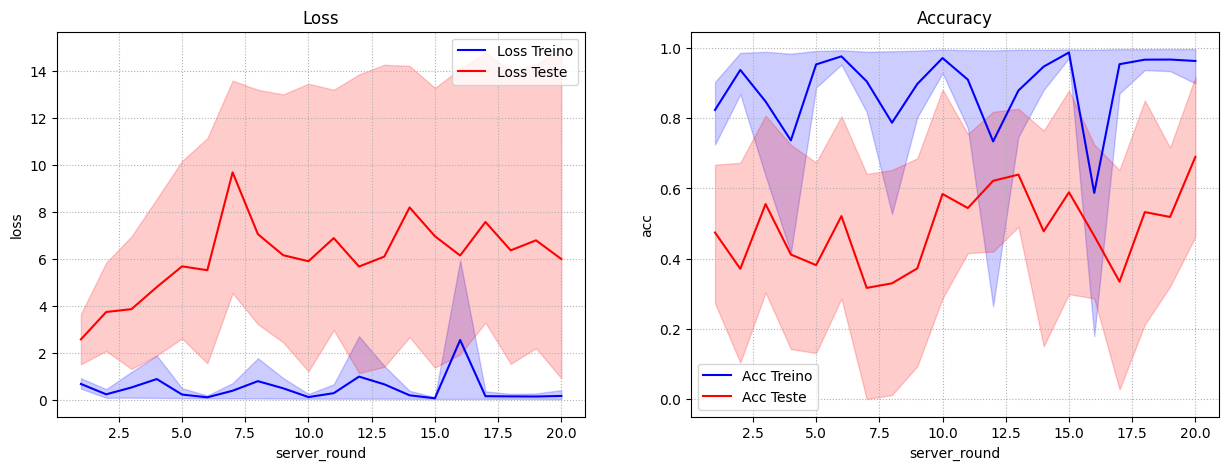

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv', names=['server_round', 'cid', 'acc', 'loss'])
df_test  = pd.read_csv('evaluate.csv', names=['server_round', 'cid', 'acc', 'loss'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(data=df_train, x='server_round', y='loss', ax=ax[0], color='b', label='Loss Treino')
sns.lineplot(data=df_train, x='server_round', y='acc', ax=ax[1], color='b', label='Acc Treino')
sns.lineplot(data=df_test, x='server_round', y='loss', ax=ax[0], color='r', label='Loss Teste')
sns.lineplot(data=df_test, x='server_round', y='acc', ax=ax[1], color='r', label='Acc Teste')

ax[0].set_title('Loss')
ax[1].set_title('Accuracy')

ax[0].grid(True, linestyle=':')
ax[1].grid(True, linestyle=':')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


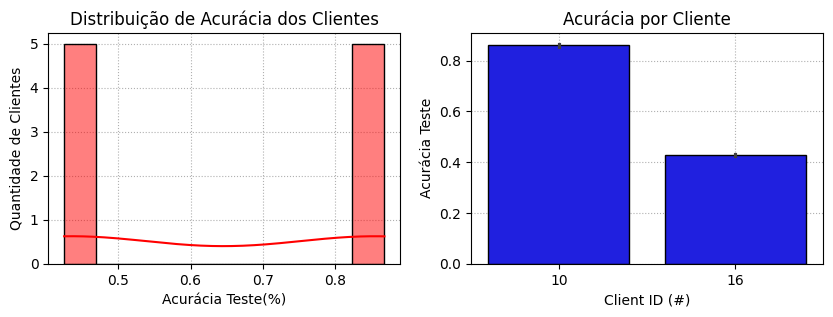

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=df_test['acc'].values[-10:], kde=True, color='r', bins=10, ax=ax[0])
sns.barplot(x=df_test['cid'].values[-10:], y=df_test['acc'].values[-10:], color='b', ec='k', ax=ax[1])

ax[0].set_title('Distribuição de Acurácia dos Clientes')
ax[0].set_ylabel('Quantidade de Clientes')
ax[0].set_xlabel('Acurácia Teste(%)')

ax[1].set_title('Acurácia por Cliente')
ax[1].set_ylabel('Acurácia Teste')
ax[1].set_xlabel('Client ID (#)')

for _ in range(2):
  ax[_].grid(True, linestyle=':')
  ax[_].set_axisbelow(True)

# Flower Simulation IID

In [55]:
NCLIENTS        = 20
NROUNDS         = 20
NIID            = False
DIRICHLET_ALPHA = 0.1
FRACTION_FIT    = 0.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def create_client(cid):
    client = Cliente(cid, NIID, NCLIENTS, DIRICHLET_ALPHA)
    return client.to_client()

In [57]:
class Simulation():
    def __init__(self):
        self.server  = Servidor(num_clients=NCLIENTS, dirichlet_alpha=DIRICHLET_ALPHA, fraction_fit=FRACTION_FIT)

    def run_simulation(self):
        fl.simulation.start_simulation(
            client_fn     = create_client,
            num_clients   = NCLIENTS,
            config        = fl.server.ServerConfig(num_rounds=NROUNDS),
            strategy      = self.server)

Simulation().run_simulation()

INFO :      Starting Flower simulation, config: num_rounds=20, no round_timeout
2024-10-13 00:38:41,077	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7987875840.0, 'object_store_memory': 3993937920.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=22945) 2024-10-13 00:38:45.864237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already be

16/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1971 - loss: 2.2621 
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2938 - loss: 2.0593
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3853 - loss: 1.8439


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:23 2s/step - accuracy: 0.1875 - loss: 2.3354
56/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 2.0218


(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945) 
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22945)         
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946) 
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
(ClientAppActor pid=22946)        

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.8408  
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4035 - loss: 1.8376


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.8632  
Rodada 1 acurácia agregada: 0.7759999930858612


(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)          [repeated 2x across cluster]
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:36 3s/step - accuracy: 0.6562 - loss: 0.9402
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7742 - loss: 0.8145
64/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.7462
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8060 - loss: 0.7130


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(Client

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8157 - loss: 0.7107
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.4946  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:25 3s/step - accuracy: 0.7188 - loss: 0.8913
31/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.7738
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.7210


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated 

Rodada 2 acurácia agregada: 0.8789999783039093
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:11 3s/step - accuracy: 0.9688 - loss: 0.3437
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.4805  
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8958 - loss: 0.4301
18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8695 - loss: 0.4955 


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


62/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - loss: 0.4432
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8800 - loss: 0.4451


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.3699  
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8727 - loss: 0.4527 [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated 

Rodada 3 acurácia agregada: 0.8910000026226044
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8775 - loss: 0.4100  
11/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9547 - loss: 0.2470 
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.2934
 9/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9018 - loss: 0.3074 
49/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9154 - loss: 0.3127


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
(ClientAppActor pid=22946)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(Client

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9065 - loss: 0.3306


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 5]


 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - accuracy: 0.8750 - loss: 0.4170
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8956 - loss: 0.3519 [repeated 8x across cluster]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8852 - loss: 0.3764  
Rodada 4 acurácia agregada: 0.9089999794960022


INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flo

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.3254  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:49 3s/step - accuracy: 0.9688 - loss: 0.1796
21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9298 - loss: 0.2589
38/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9196 - loss: 0.2790
61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9155 - loss: 0.2829
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.2865
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9124 - loss: 0.2889


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:25 3s/step - accuracy: 0.9688 - loss: 0.1110


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.3434  
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.3158
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.3125


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated 

Rodada 5 acurácia agregada: 0.9179999828338623
11/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9171 - loss: 0.2621  [repeated 2x across cluster]
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9216 - loss: 0.2578
46/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9238 - loss: 0.2577
61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.2593
82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9251 - loss: 0.2615
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9249 - loss: 0.2634
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:50 3s/step - accuracy: 0.9375 - loss: 0.3213
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9324 - loss: 0.2470


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(Client

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9271 - loss: 0.2612


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.2793  
66/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9285 - loss: 0.2592
Rodada 6 acurácia agregada: 0.9199999868869781
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.3396  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:34 3s/step - accuracy: 0.9375 - loss: 0.3544
17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.2432
35/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9456 - loss: 0.2301
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.2270
72/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.2269
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9399 - loss: 0.2290
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9392 - loss: 0.2297


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(Client

 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 397ms/step - accuracy: 0.9375 - loss: 0.1217 [repeated 2x across cluster]
55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9426 - loss: 0.2291
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9387 - loss: 0.2363
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.2649  
Rodada 7 acurácia agregada: 0.9229999780654907


INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.3440  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:55 3s/step - accuracy: 0.8125 - loss: 0.5033
27/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9168 - loss: 0.2639


INFO :      aggregate_fit: received 2 results and 0 failures


60/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.2498
 1/94 ━━━━━━━━━━━━━━━━━━━━ 5:02 3s/step - accuracy: 0.8750 - loss: 0.2813
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9290 - loss: 0.2419


INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions o

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.3349  
29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9266 - loss: 0.2179
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9346 - loss: 0.2147


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated 

Rodada 8 acurácia agregada: 0.9249999821186066
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:34 3s/step - accuracy: 0.9062 - loss: 0.3170
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9272 - loss: 0.2582  
11/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9481 - loss: 0.2088 
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9480 - loss: 0.2090
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9470 - loss: 0.2120
51/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9450 - loss: 0.2145
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9439 - loss: 0.2149
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9432 - loss: 0.2136


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


25/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1909 


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/16 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 1.0000 - loss: 0.0865
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9383 - loss: 0.2042
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9446 - loss: 0.2388  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.9062 - loss: 0.2982
Rodada 9 acurácia agregada: 0.9289999902248383


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 0.1457 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9061 - loss: 0.3211  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:28 3s/step - accuracy: 1.0000 - loss: 0.0390
46/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1806
29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9386 - loss: 0.1828


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1885
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9462 - loss: 0.1898
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9403 - loss: 0.1891


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/16 ━━━━━━━━━━━━━━━━━━━━ 13s 871ms/step - accuracy: 0.9062 - loss: 0.3237
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9389 - loss: 0.1880
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9044 - loss: 0.3127


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
(ClientAppActor pid=22946)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated

Rodada 10 acurácia agregada: 0.9259999990463257
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9328 - loss: 0.2351  
16/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9595 - loss: 0.1710 
18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9156 - loss: 0.2756 
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9579 - loss: 0.1653


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(Client

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9396 - loss: 0.2103
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9544 - loss: 0.1687


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.2374  
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1678 [repeated 2x across cluster]
Rodada 11 acurácia agregada: 0.9289999902248383


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9134 - loss: 0.3095  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:27 2s/step - accuracy: 0.9688 - loss: 0.2855
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9491 - loss: 0.1818
70/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: 0.1748
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9516 - loss: 0.1719


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


32/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.1220 
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9534 - loss: 0.1493


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 0.3285  
Rodada 12 acurácia agregada: 0.9309999942779541
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9442 - loss: 0.2268  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9674 - loss: 0.1475 
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9610 - loss: 0.1550
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1550


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


28/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.1720 


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.2218  
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1724
Rodada 13 acurácia agregada: 0.9320000112056732
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.3379  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:25 2s/step - accuracy: 0.9062 - loss: 0.1960
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1343


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


57/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1437
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9525 - loss: 0.1467


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.9688 - loss: 0.0817 [repeated 2x across cluster]
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1517
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9537 - loss: 0.1566 [repeated 2x across cluster]
Rodada 14 acurácia agregada: 0.929999977350235
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - loss: 0.2186  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.3283  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:28 2s/step - accuracy: 1.0000 - loss: 0.0752
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1436
69/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1491
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9615 - loss: 0.1476


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1160 
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9603 - loss: 0.1256


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9381 - loss: 0.2230  
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9386 - loss: 0.2245


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.9375 - loss: 0.2913
Rodada 15 acurácia agregada: 0.9339999854564667
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.3181  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0787 
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:27 2s/step - accuracy: 0.9375 - loss: 0.1344
49/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9753 - loss: 0.1060
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9622 - loss: 0.1295


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.1113


(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.
(ClientAppActor pid=22946)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.3416  
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9632 - loss: 0.1294 [repeated 3x across cluster]
 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.9688 - loss: 0.0736
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9396 - loss: 0.2188  
Rodada 16 acurácia agregada: 0.93299999833107


(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 1.0000 - loss: 0.0432
35/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.1011
65/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.1026
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9678 - loss: 0.1071


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 1.0000 - loss: 0.0539


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1164
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1163
 1/16 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.9375 - loss: 0.3054
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.3296  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 14s 948ms/step - accuracy: 0.9688 - loss: 0.0773
Rodada 17 acurácia agregada: 0.9359999895095825
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9476 - loss: 0.2195   


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


13/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9492 - loss: 0.1275 
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9547 - loss: 0.1169
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9568 - loss: 0.1181
59/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9587 - loss: 0.1195
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9598 - loss: 0.1208
 1/94 ━━━━━━━━━━━━━━━━━━━━ 3:32 2s/step - accuracy: 0.9375 - loss: 0.2609
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9604 - loss: 0.1205
13/94 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9560 - loss: 0.1424


INFO :      aggregate_fit: received 2 results and 0 failures


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9606 - loss: 0.1204
39/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.1138


INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions o

 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 823ms/step - accuracy: 0.9688 - loss: 0.0795
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9669 - loss: 0.1099 [repeated 2x across cluster]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9468 - loss: 0.2178


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated

Rodada 18 acurácia agregada: 0.9360000193119049
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9122 - loss: 0.3307   
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:28 2s/step - accuracy: 1.0000 - loss: 0.0735
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.0867


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


65/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0886
86/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9739 - loss: 0.0908


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9735 - loss: 0.0921
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9651 - loss: 0.1086
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9081 - loss: 0.3467
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:29 2s/step - accuracy: 0.9688 - loss: 0.0976
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1071
62/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9647 - loss: 0.1079


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 8s 570ms/step - accuracy: 0.9688 - loss: 0.0752
Rodada 19 acurácia agregada: 0.9319999814033508
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.2300  


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0624 
51/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0790
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9742 - loss: 0.0858
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.0879


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 3:00 2s/step - accuracy: 0.9688 - loss: 0.1676
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.1024


(ClientAppActor pid=22945)          [repeated 4x across cluster]
(ClientAppActor pid=22945) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22945)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22945)             entirely in future versions of Flower.
(ClientAppActor pid=22946) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=22946)             This is a deprecated feature. It will be removed
(ClientAppActor pid=22946)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.2188   
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0986


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 20 round(s) in 304.26s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.7759999930858612
INFO :      		round 2: 0.8789999783039093
INFO :      		round 3: 0.8910000026226044
INFO :      		round 4: 0.9089999794960022
INFO :      		round 5: 0.9179999828338623
INFO :      		round 6: 0.9199999868869781
INFO :      		round 7: 0.9229999780654907
INFO :      		round 8: 0.9249999821186066
INFO :      		round 9: 0.9289999902248383
INFO :      		round 10: 0.9259999990463257
INFO :      		round 11: 0.9289999902248383
INFO :      		round 12: 0.9309999942779541
INFO :      		round 13: 0.9320000112056732
INFO :      		round 14: 0.929999977350235
INFO :      		round 15: 0.9339999854564667
INFO :      		round 16: 0.93299999833107
INFO :      		round 17: 0.9359999895095825
INFO :      		round 18: 0.9360000193119049
INFO :      		round 19: 0.9319999814033508
INFO

 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 489ms/step - accuracy: 0.9062 - loss: 0.3362
Rodada 20 acurácia agregada: 0.9290000200271606
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - loss: 0.3397  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


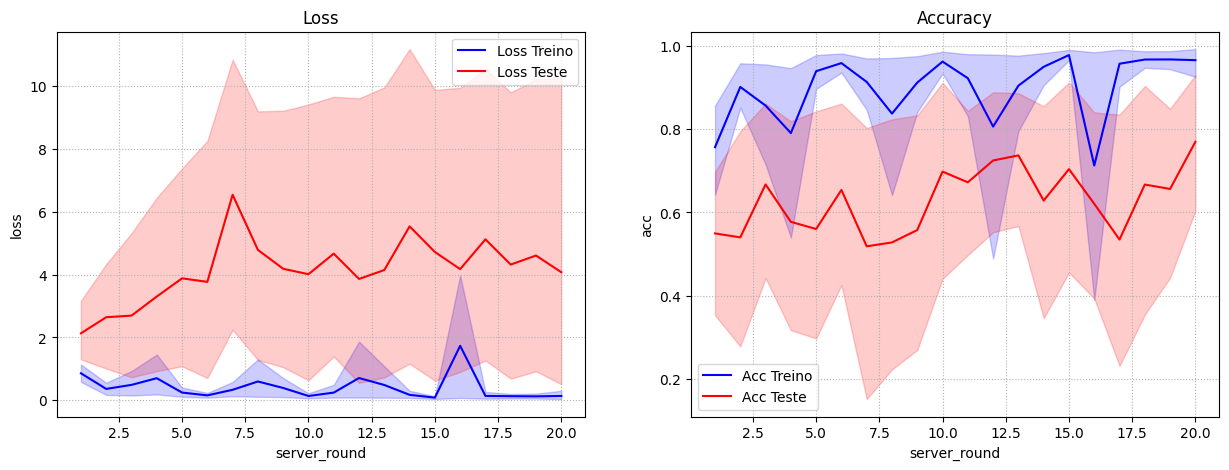

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv', names=['server_round', 'cid', 'acc', 'loss'])
df_test  = pd.read_csv('evaluate.csv', names=['server_round', 'cid', 'acc', 'loss'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(data=df_train, x='server_round', y='loss', ax=ax[0], color='b', label='Loss Treino')
sns.lineplot(data=df_train, x='server_round', y='acc', ax=ax[1], color='b', label='Acc Treino')
sns.lineplot(data=df_test, x='server_round', y='loss', ax=ax[0], color='r', label='Loss Teste')
sns.lineplot(data=df_test, x='server_round', y='acc', ax=ax[1], color='r', label='Acc Teste')

ax[0].set_title('Loss')
ax[1].set_title('Accuracy')

ax[0].grid(True, linestyle=':')
ax[1].grid(True, linestyle=':')

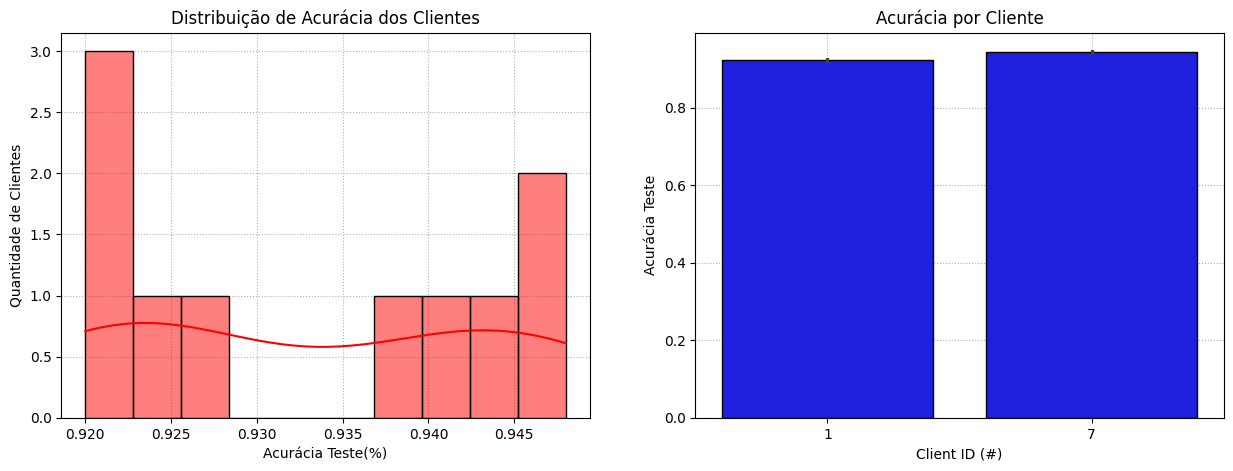

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x=df_test['acc'].values[-10:], kde=True, color='r', bins=10, ax=ax[0])
sns.barplot(x=df_test['cid'].values[-10:], y=df_test['acc'].values[-10:], color='b', ec='k', ax=ax[1])

ax[0].set_title('Distribuição de Acurácia dos Clientes')
ax[0].set_ylabel('Quantidade de Clientes')
ax[0].set_xlabel('Acurácia Teste(%)')

ax[1].set_title('Acurácia por Cliente')
ax[1].set_ylabel('Acurácia Teste')
ax[1].set_xlabel('Client ID (#)')

for _ in range(2):
  ax[_].grid(True, linestyle=':')
  ax[_].set_axisbelow(True)